In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')


In [2]:
%matplotlib inline

In [3]:
import os
import json

# Data Wrangling
import h5py
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import glob
import flammkuchen as fl
import shutil
import seaborn as sns
import matplotlib as mpl
from tqdm import tqdm

In [ ]:
from filter_helper import smooth_trace, process_data, filter_trials

### Load data

In [170]:
master_path = Path(r'\\portulab.synology.me\data\Kata\testdata\Raw_Data')

fish_paths = list(master_path.glob('*f[0-9]*'))
fish_paths, len(fish_paths)

([WindowsPath('//portulab.synology.me/data/Kata/Data/13052024_visstim_2D_round/240513_f0'),
  WindowsPath('//portulab.synology.me/data/Kata/Data/13052024_visstim_2D_round/240513_f1'),
  WindowsPath('//portulab.synology.me/data/Kata/Data/13052024_visstim_2D_round/240513_f10'),
  WindowsPath('//portulab.synology.me/data/Kata/Data/13052024_visstim_2D_round/240513_f2'),
  WindowsPath('//portulab.synology.me/data/Kata/Data/13052024_visstim_2D_round/240513_f3'),
  WindowsPath('//portulab.synology.me/data/Kata/Data/13052024_visstim_2D_round/240513_f4'),
  WindowsPath('//portulab.synology.me/data/Kata/Data/13052024_visstim_2D_round/240513_f5'),
  WindowsPath('//portulab.synology.me/data/Kata/Data/13052024_visstim_2D_round/240513_f6'),
  WindowsPath('//portulab.synology.me/data/Kata/Data/13052024_visstim_2D_round/240513_f7'),
  WindowsPath('//portulab.synology.me/data/Kata/Data/13052024_visstim_2D_round/240513_f8'),
  WindowsPath('//portulab.synology.me/data/Kata/Data/13052024_visstim_2D_round/

In [197]:
fish= 0
fish_path = fish_paths[fish]
fish_id =  fish_paths[fish].name#[:-13]
exp_name = Path(fish_paths[fish]).parts[-2]
exp_name = 'testfish'
exp_name, fish_id

('240513_f2', '13052024_visstim_2D_round')

In [198]:
out_path = Path(r'\\portulab.synology.me\data\Kata\testdata\Processed_Data')

## Load data all

In [199]:
data = fl.load(out_path/ '{}_tensor_ipsi_contra.h5'.format(fish_id))
laterality = fl.load(out_path/ '{}_bout_laterality.h5'.format(fish_id))
laterality.shape

(124,)

In [200]:
tail = data[:, 0, :]
i_fins = data[:, 1, :]
c_fins = data[:, 2, :]
data.shape

(124, 3, 50)

In [201]:
### Get automatic rows and columns depending on data shape
n_plots = tail.shape[0]
max_columns = 20
n_rows = n_plots // max_columns if n_plots % max_columns == 0 else n_plots // max_columns + 1
n_columns = min(n_plots, max_columns)

# Define the width and height of each subplot
subplot_width = 3
subplot_height = 5

print (n_rows, n_columns)

7 20


## Plot all

In [202]:
tails, ipsi_fin, contra_fin = process_data(tail, i_fins, c_fins, laterality)
tails.shape

(124, 50)
(124, 50)


(124, 50)

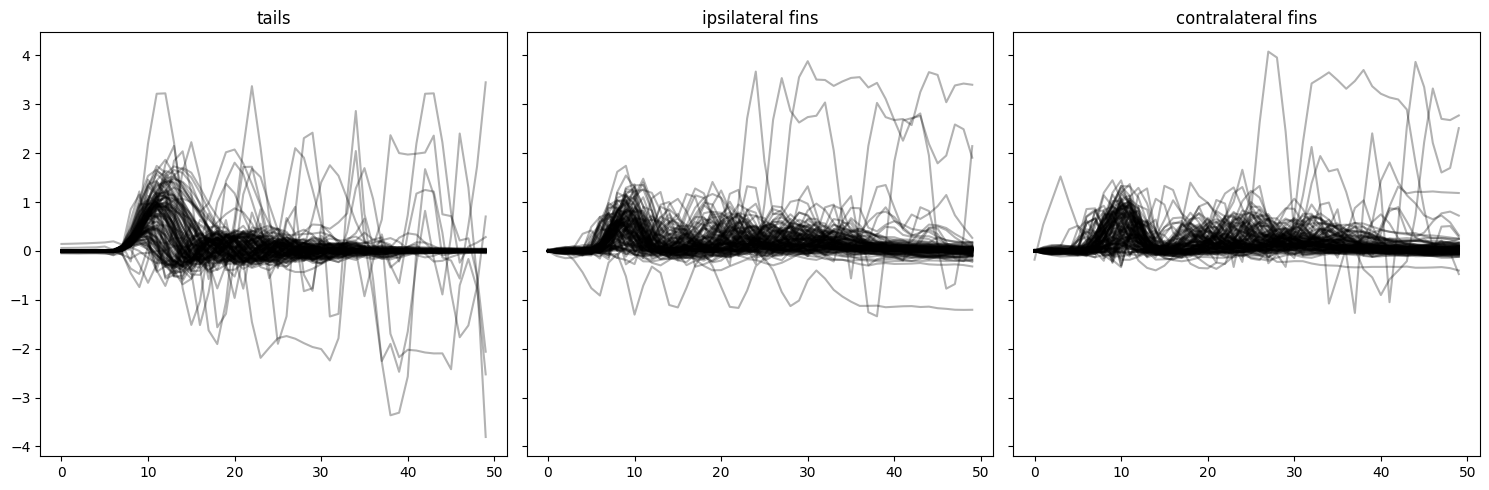

In [203]:
fig, axes = plt.subplots(1,3, figsize=(15, 5), sharex=True, sharey=True)
axes = axes.ravel()

# axes[0].plot(tail.T, c='k', alpha=0.3)
axes[0].plot(tails.T, c='k', alpha=0.3)
axes[1].plot(ipsi_fin.T, c='k', alpha=0.3)
axes[2].plot(contra_fin.T, c='k', alpha=0.3)

axes[0].set_title('tails')
axes[1].set_title('ipsilateral fins')
axes[2].set_title('contralateral fins')

plt.tight_layout()


In [204]:
# Set your desired threshold value
threshold_value = 0.15
max_threshold_factor = 2  # Example factor to define "significantly larger"

# Filter the trials
f_tails, f_ipsi_fin, f_contra_fin, good_bouts = filter_trials( tails, ipsi_fin, contra_fin, threshold=threshold_value, baseline_points=5,  max_threshold_factor=max_threshold_factor)


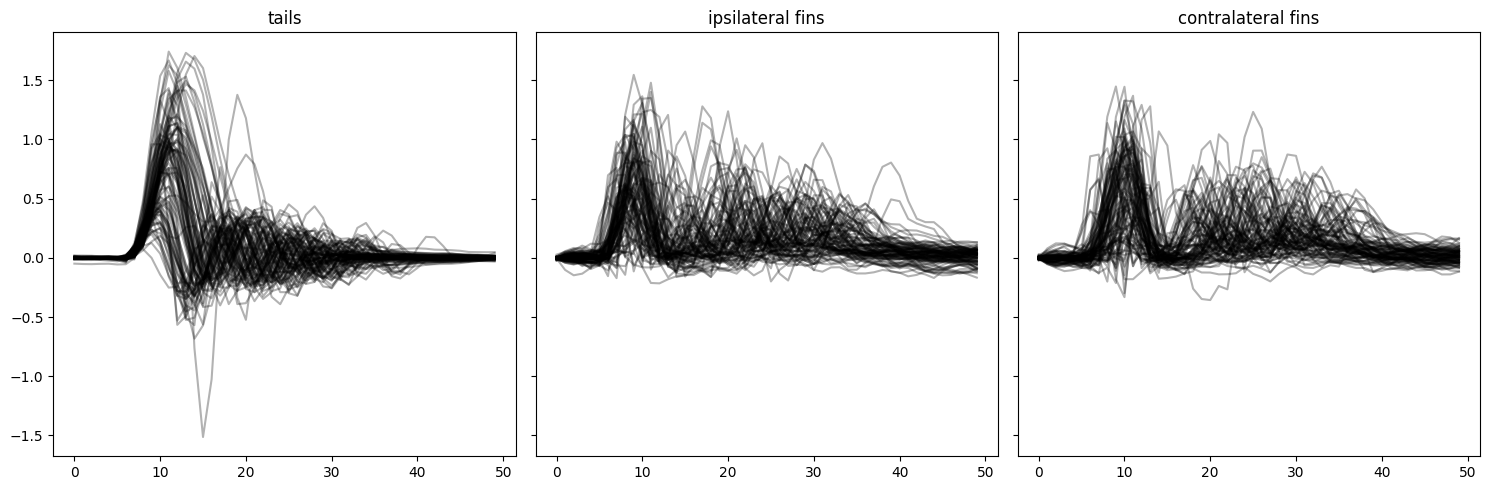

In [205]:
fig, axes = plt.subplots(1,3, figsize=(15, 5), sharex=True, sharey=True)
axes = axes.ravel()

axes[0].plot(f_tails.T, c='k', alpha=0.3)
axes[1].plot(f_ipsi_fin.T, c='k', alpha=0.3)
axes[2].plot(f_contra_fin.T, c='k', alpha=0.3)

axes[0].set_title('tails')
axes[1].set_title('ipsilateral fins')
axes[2].set_title('contralateral fins')

plt.tight_layout()


In [206]:
print (' total bouts' ,tail.shape[0])
print (' Bouts filtered', tail.shape[0] - good_bouts.sum())
print (' bouts keps', good_bouts.sum())

 total bouts 124
 Bouts filtered 27
 bouts keps 97


## Plot

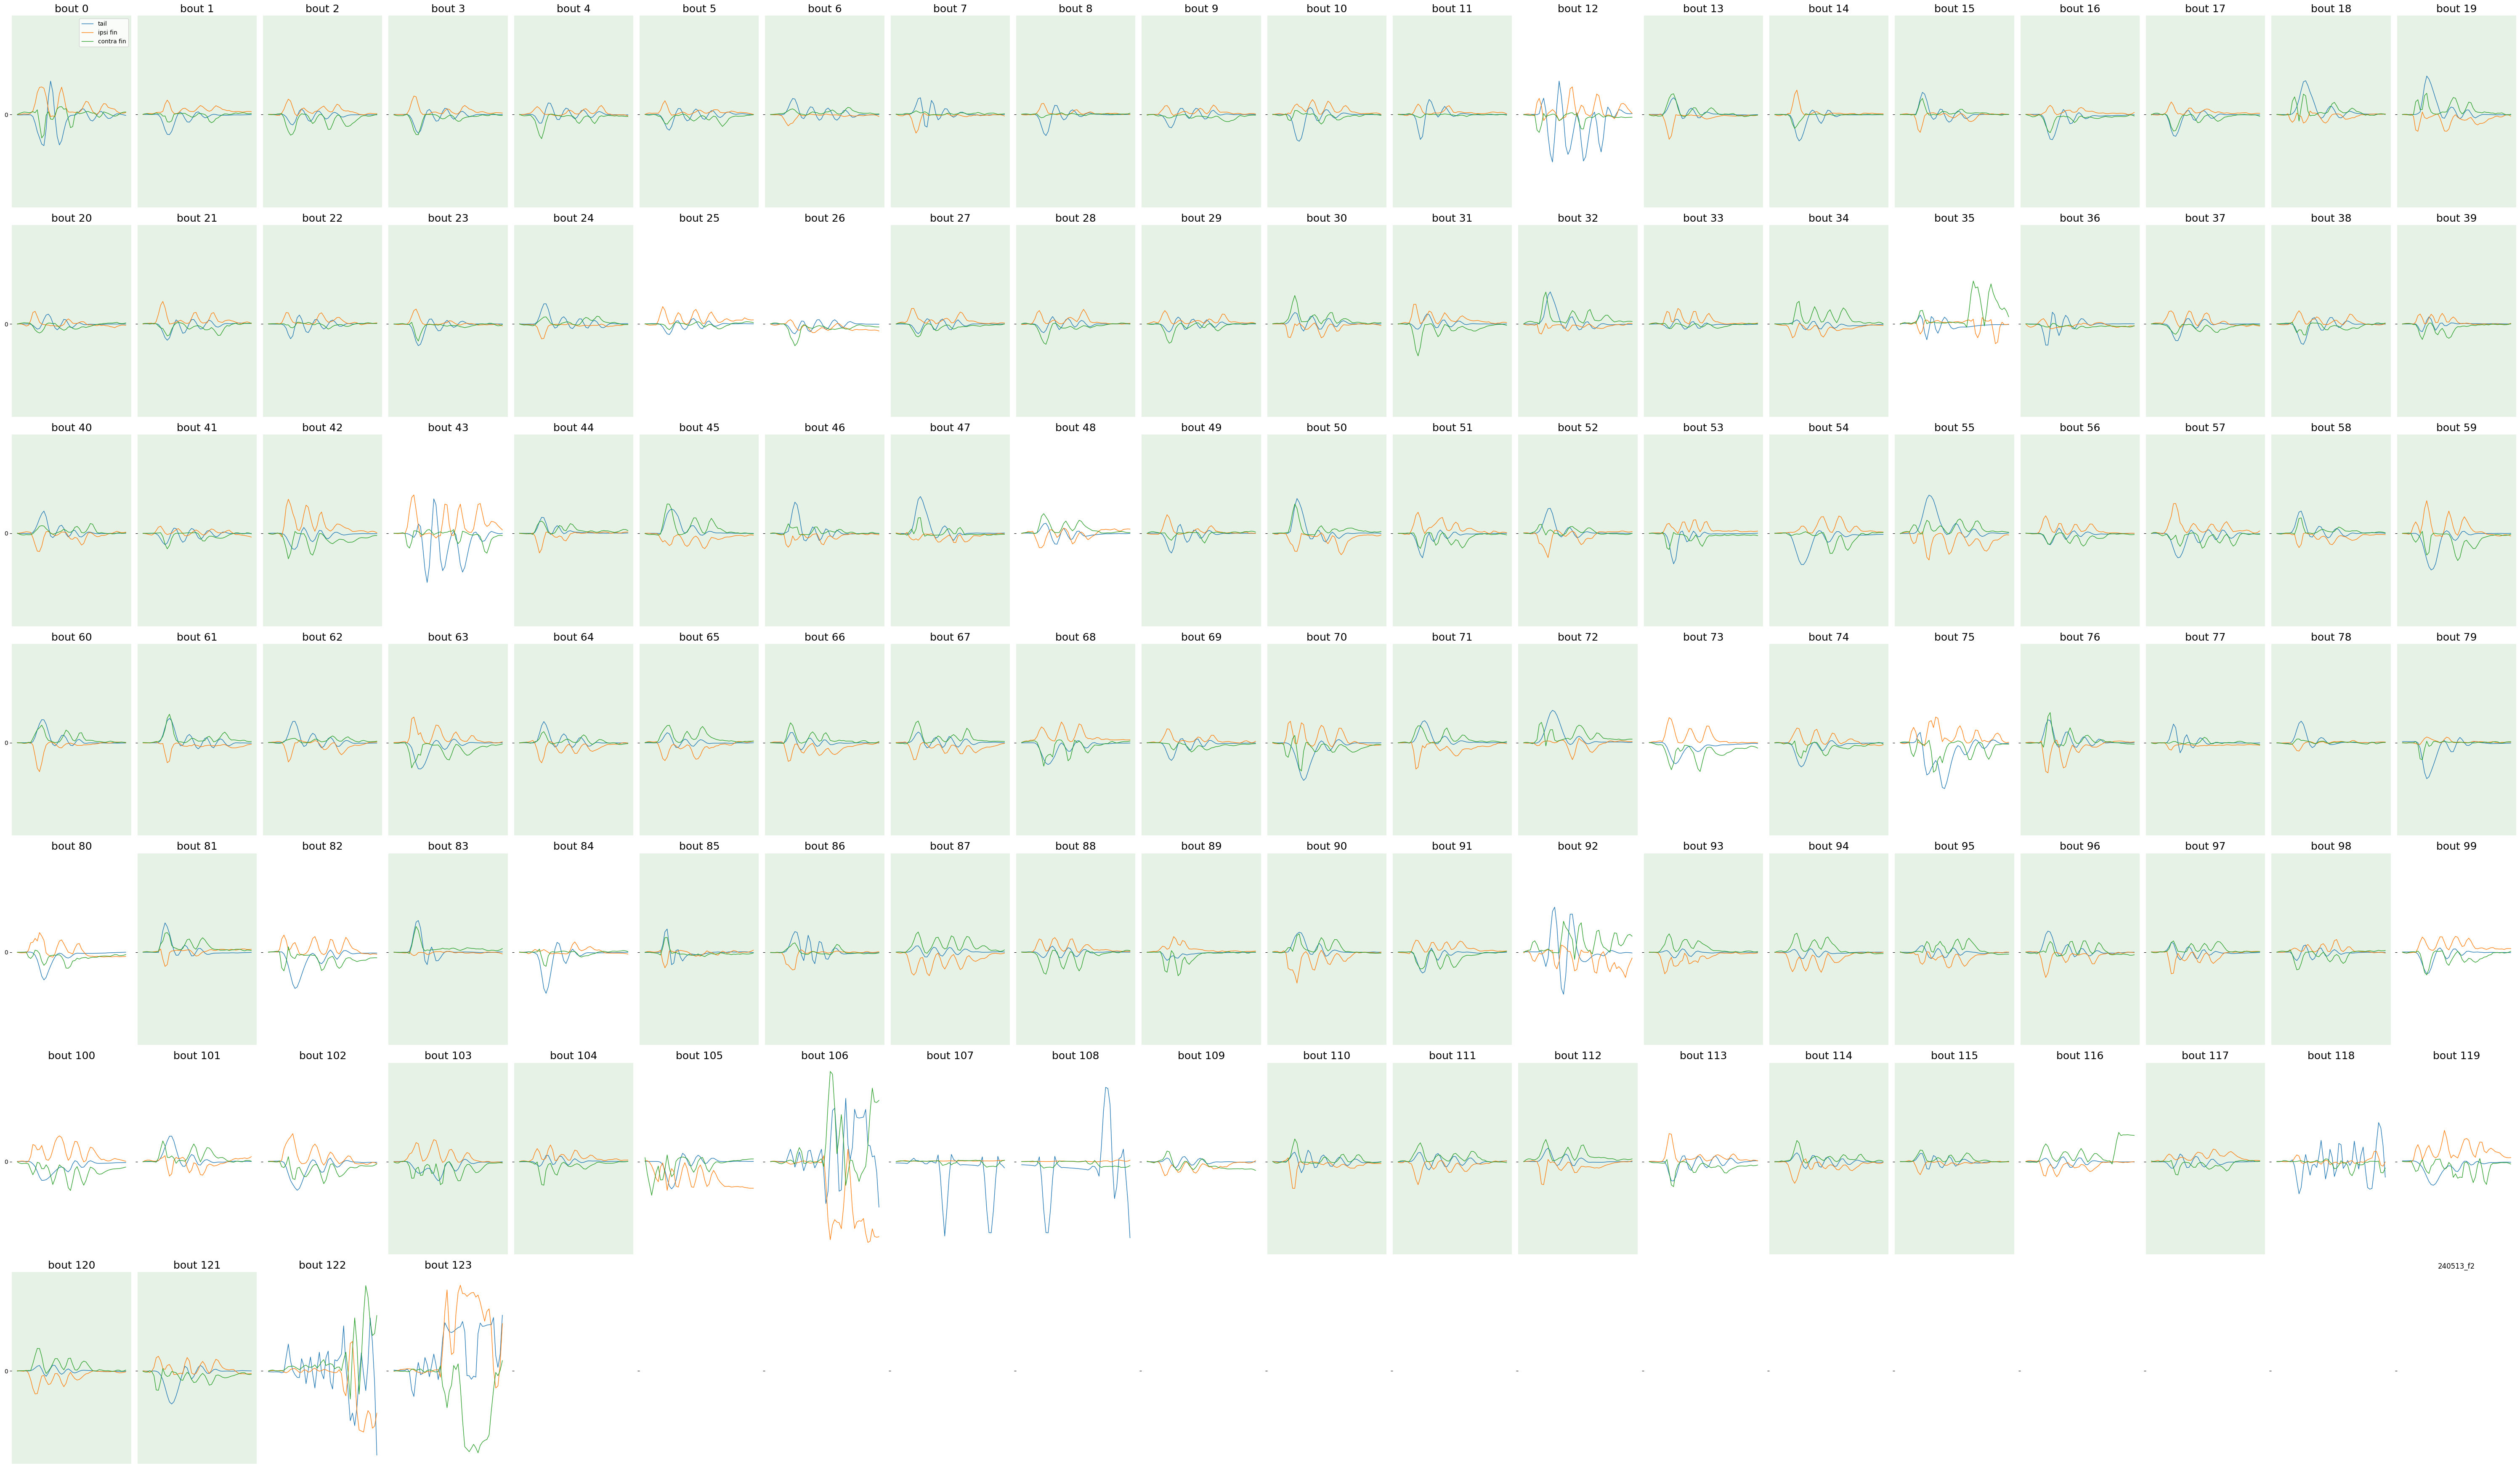

In [208]:
fsize =18
fig, axes = plt.subplots(n_rows, n_columns, figsize=(n_columns*subplot_width, n_rows*subplot_height), sharex=True, sharey=True)
axes= axes.ravel()

for i in range(tail.shape[0]):
    axes[i].set_title('bout {}'.format(i), fontsize=fsize)
    axes[i].plot(tail[i], lw=1, label='tail')
    axes[i].plot(i_fins[i], lw=1, label='ipsi fin')
    axes[i].plot(c_fins[i], lw=1, label='contra fin')
    axes[i].set_xticks([])
    axes[i].set_yticks([0])
    
    if good_bouts[i]==True:
        axes[i].set_facecolor('green')
        axes[i].patch.set_alpha(0.1)
        
axes[0].legend()
plt.title(fish_id)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.tight_layout()
plt.savefig(Path(out_path/'plots'/"{}_bouts_overview.png".format(fish_id)),  dpi=300)

In [209]:
# add = [ 
# 14, 121,
#       ]
# for i in add:
#     good_bouts[i] = True

# discard = [ 
# 90, 96, 112, 164, 
#           ]
# for i in discard:
#     good_bouts[i] = False

### Manually double check

In [210]:
good_bouts = np.asarray(good_bouts)

## Save the manually filtered ids
    Note: The good bouts stay = True, otherwise False. The manual filter is inverted because it is easier to apply.

In [211]:
fl.save(Path(out_path/'filtered'/"{}_manual_filter_f.csv".format(fish_id)), good_bouts) #this saves goood bouts
Path(out_path/'filtered'/"{}_manual_filter_f.csv".format(fish_id))

WindowsPath('//portulab.synology.me/data/Kata/Processed_Data/13052024_visstim_2D_round_/filtered/240513_f2_manual_filter_f.csv')

In [212]:
print ('done')

done
